# Introduction to CNN and Computer vision with TF

### Getting the data

In [1]:
%ls ..\data\pizza_steak\train\steak

 Volume in drive E is Others
 Volume Serial Number is 4EBF-4A29

 Directory of e:\Studies\Github\deep-learning\data\pizza_steak\train\steak

12/14/2025  08:36 PM    <DIR>          .
12/14/2025  08:36 PM    <DIR>          ..
09/20/2019  10:06 PM            36,185 1000205.jpg
09/20/2019  10:06 PM            34,497 100135.jpg
09/20/2019  10:06 PM           116,802 101312.jpg
09/20/2019  10:06 PM            56,754 1021458.jpg
09/20/2019  10:06 PM            34,143 1032846.jpg
09/20/2019  10:06 PM            24,688 10380.jpg
09/20/2019  10:06 PM            37,134 1049459.jpg
09/20/2019  10:06 PM            49,841 1053665.jpg
09/20/2019  10:06 PM            59,983 1068516.jpg
09/20/2019  10:06 PM            28,996 1068975.jpg
09/20/2019  10:06 PM            29,525 1081258.jpg
09/20/2019  10:06 PM            49,577 1090122.jpg
09/20/2019  10:06 PM            59,976 1093966.jpg
09/20/2019  10:06 PM            60,253 1098844.jpg
09/20/2019  10:06 PM            69,843 1100074.jpg
09/20/2019  10:

In [2]:
import os

# Walk through the pizza_steak directory and list number of files.
for dirpath, dirnames, filenames in os.walk("..\data\pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '..\data\pizza_steak'.
There are 2 directories and 0 images in '..\data\pizza_steak\test'.
There are 0 directories and 250 images in '..\data\pizza_steak\test\pizza'.
There are 0 directories and 250 images in '..\data\pizza_steak\test\steak'.
There are 2 directories and 0 images in '..\data\pizza_steak\train'.
There are 0 directories and 750 images in '..\data\pizza_steak\train\pizza'.
There are 0 directories and 750 images in '..\data\pizza_steak\train\steak'.


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MSI\AppData\Local\Temp\ipykernel_15000\2881255389.py:4: SyntaxWarning: invalid escape sequence '\d'
  for dirpath, dirnames, filenames in os.walk("..\data\pizza_steak"):


In [3]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("../data/pizza_steak/train/steak"))
num_steak_images_train

750

In [4]:
num_pizza_images_train = len(os.listdir("../data/pizza_steak/train/pizza"))
num_pizza_images_train

750

In [5]:
# To visualize our images, first let's get the class names programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("../data/pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories.
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1) # randomly sample one of the items from target_folder

    img = mpimg.imread(target_folder + "/" + random_image[0]) # It will come as a list so we give [0]
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


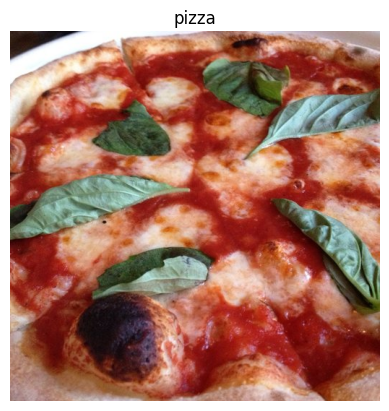

In [7]:
# View a random image from the training data-set
img = view_random_image(target_dir="../data/pizza_steak/train/",
                        target_class="pizza")

### An end to end example of CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator is considered legacy. TensorFlow now prefers: tf.keras.utils.image_dataset_from_directory & tf.data pipelines

tf.random.set_seed(42)

# Preprocess the data(get all of the pixel values between 0 & 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "../data/pizza_steak/train"
test_dir = "../data/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42) # Takes the path to a directory and generates batches of augmented data

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model ( same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"), #Filters, kernel size and acti
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"), 
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                     
])

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# We are able to just use train data and not x and y because the target labels and all that is automatically created by the flow_from_directory.
histor_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 501ms/step - accuracy: 0.6847 - loss: 0.5984 - val_accuracy: 0.7400 - val_loss: 0.5182
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7673 - loss: 0.4798 - val_accuracy: 0.8380 - val_loss: 0.3821
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8033 - loss: 0.4310 - val_accuracy: 0.8420 - val_loss: 0.3803
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8327 - loss: 0.4028 - val_accuracy: 0.7820 - val_loss: 0.4562
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.8367 - loss: 0.3884 - val_accuracy: 0.8320 - val_loss: 0.3943


In [ ]:
# 1. Kernel (Filter) Size
# The kernel (or filter) is a small matrix that slides over the image to extract features. It is the "window"
# Common sizes:
# 3×3 (most common)
# 5×5
# 7×7 (rare now)

# Example:
# Conv2D(filters=32, kernel_size=3)

# What it does
# Each kernel:
# looks at a local region
# detects patterns like:
# edges
# corners
# textures

# Why small kernels (3×3) dominate
# Fewer parameters
# Stack multiple layers → larger receptive field
# More nonlinearities
# Two stacked 3×3 convolutions ≈ one 5×5 receptive field, but:
# fewer parameters
# more expressive

# 2. Stride
# stride controls how far the kernel moves each step.

# Example:
# Conv2D(32, 3, strides=2)

# Effect
# Stride	Behavior
# 1	Slides one pixel at a time
# 2	Skips pixels (downsampling)
# Output size formula (no padding)

# reduces spatial resolution
# acts like pooling
# increases computational efficiency

# 3. Padding
# Padding adds extra pixels (usually zeros) around the image border.

# Types:
# valid → no padding
# same → output size = input size

# Example:
# Conv2D(32, 3, padding="same")

# Why padding is needed
# Without padding:
# image shrinks after every convolution
# border information is lost quickly


# Padding preserves:
# spatial dimensions
# edge features

# 4. Pooling
# Pooling reduces spatial dimensions while keeping important information.

# Most common:
# MaxPool2D(pool_size=2)

# Types
# Max Pooling
# Takes maximum value in window
# Keeps strongest activation

# Average Pooling
# Takes average
# Smooths features

# Why pooling is used
# Reduces computation
# Adds translation invariance
# Controls overfitting

# Example:
# Input: 112×112×32
# After MaxPool(2×2): 56×56×32

### Binary Classification: Let's break it down
1. Become one with the data (Visualize)
2. Preprocess the data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


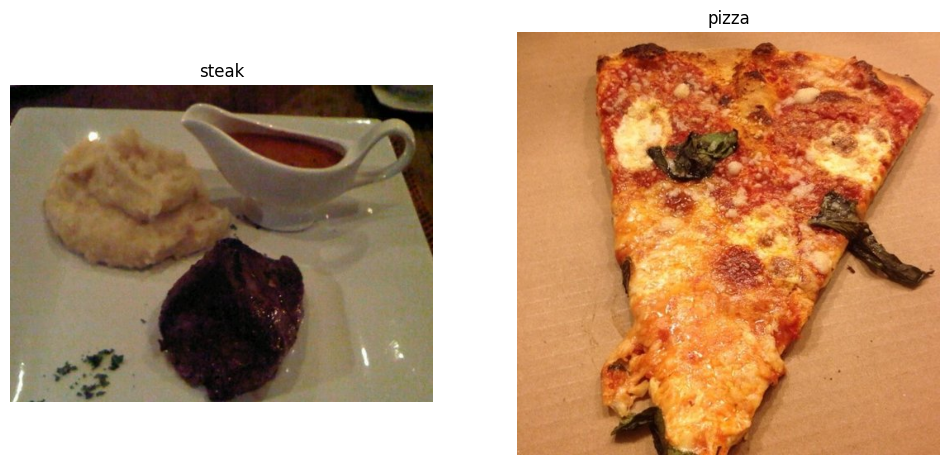

In [30]:
# Visualization
plt.figure(figsize=(12,6))
plt.subplot(1,2,1) # Number of rows, columns and this subplot column
steak_img = view_random_image("../data/pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("../data/pizza_steak/train/", "pizza")

In [21]:
# Preprocess the data (prepare it for a model)
# Define the directory dataset paths
train_dir = "../data/pizza_steak/train/"
test_dir = "../data/pizza_steak/test/"


In [22]:
# Create train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
# This function also auto labels them from the directory names
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [35]:
# Lets create a baseline CNN model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [38]:
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3),
           strides=(1,1), padding="same", # if same then output shape is same as input shape but if valid then output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)), # input layer (specify input shape)
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (workin with binary classification so only 1 output neuron)
])

In [39]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
# check lengths of training and test data generators
len(train_data), len(test_data)


(47, 16)

In [41]:
# Fitting the model
history_2 = model_2.fit(train_data, # Combination of labels and sample data so dont need to pass x and y
                         epochs=5,
                          steps_per_epoch=len(train_data),
                           validation_data=test_data,
                            validation_steps=len(test_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 315ms/step - accuracy: 0.5120 - loss: 1.1574 - val_accuracy: 0.5760 - val_loss: 0.6870
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6900 - loss: 0.5924 - val_accuracy: 0.7880 - val_loss: 0.4970
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.7787 - loss: 0.4803 - val_accuracy: 0.8100 - val_loss: 0.4517
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8187 - loss: 0.4128 - val_accuracy: 0.7820 - val_loss: 0.4550
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9027 - loss: 0.2786 - val_accuracy: 0.8380 - val_loss: 0.3740


<Axes: >

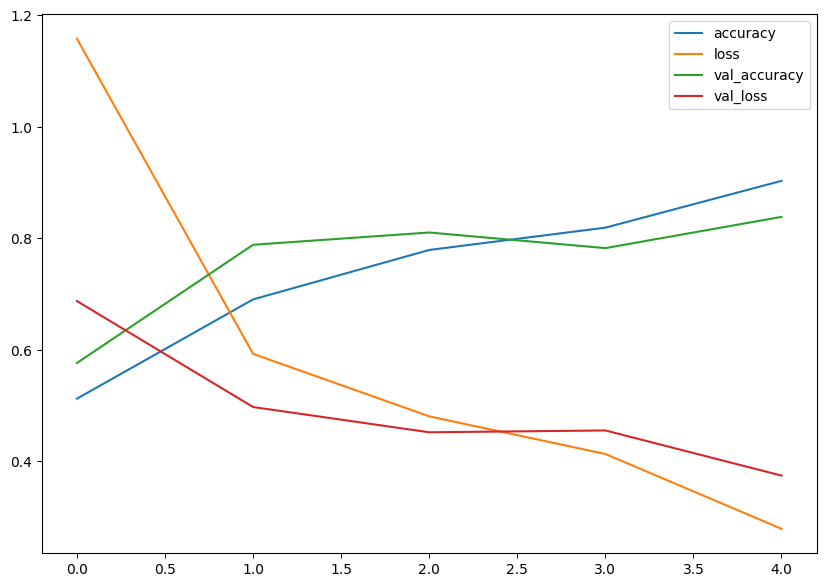

In [ ]:
# Evaluation
# Lets plot the curve
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10,7))

In [ ]:
# Creating a new baseline model that reduces overfitting with pooling layers
model_3 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# compile
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [46]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                          steps_per_epoch=len(train_data),
                           validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6260 - loss: 0.6327 - val_accuracy: 0.7640 - val_loss: 0.5065
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7820 - loss: 0.4990 - val_accuracy: 0.8300 - val_loss: 0.4035
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7953 - loss: 0.4465 - val_accuracy: 0.8600 - val_loss: 0.3785
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8260 - loss: 0.4193 - val_accuracy: 0.8440 - val_loss: 0.3588
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8293 - loss: 0.3902 - val_accuracy: 0.8520 - val_loss: 0.3454
